<a href="https://colab.research.google.com/github/jwengr/dacon/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### pandas_profilling을 이용하여 간단한 EDA를 합니다.

In [ ]:
!pip install pandas_profiling --upgrade

In [41]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
pd.options.mode.chained_assignment = None

In [43]:
defaultpath = 'drive/My Drive/dacon/sosul/dataset'

In [44]:
train_df = pd.read_csv(defaultpath+'/train.csv',encoding='utf-8')

In [45]:
test_df = pd.read_csv(defaultpath+'/test_x.csv',encoding='utf-8')

In [46]:
train_pp = pp.ProfileReport(train_df)
test_pp = pp.ProfileReport(test_df)

In [47]:
train_pp

In [48]:
test_pp

데이터는 인덱스, 문장, 저자로 3개의 열로 이루어져 있습니다.
train
결측치는 존재하지 않습니다.
text컬럼
중복값이 일부 존재합니다. 그리고  * * * * * 같은 의미없는 문장도 존재합니다.
자세히 살펴볼 필요가 있습니다.
2번이상 중복된 문장도 존재합니다.
문장의 길이는 왜도?가 좌로 심하게 치우쳐져 있습니다.
추가로 더 살펴봐야 할 필요가 있습니다.
작가
작가의 클래스별 분포는 동일하지 않습니다.
test
결측치는 존재하지 않습니다.
text컬럼
중복값이 일부 존재합니다.
문장의 길이가 좌로 치우쳐져 있습니다.
하지만 문장의 최소길이는 train은 9인 반면에 test는 130으로 깁니다.

특수문자 EDA

In [49]:
spec_char = set()
for text in train_df['text'].values:
    spec_char |=set(re.findall('[^a-zA-Z0-9]',text))
spec_char = list(spec_char)

In [50]:
print(spec_char)

['‘', 'æ', '{', 'œ', 'ñ', '£', '-', 'î', ':', '&', 'ê', '[', ']', 'è', ')', '*', 'ë', '/', '.', 'ù', 'ì', '”', '(', '_', 'ä', 'ö', ';', ',', '!', 'Ê', '‐', 'º', 'ô', '"', '}', ' ', '’', 'é', "'", '—', 'â', '“', 'ç', 'Œ', 'ü', 'ï', '#', '?', 'à', 'Æ']


다양한 특수문자가 사용되고 있습니다.
특수문자가 어떻게 사용되는지 살펴보겠습니다.

In [51]:
for sc in spec_char:
    print(sc)
    print(train_df[train_df['text'].str.contains('\\'+sc)].head())
    print()

‘
    df_index                                               text  author
19        19  ‘Why, the fact is,’ returned odin, ‘Mr. odin h...       0
29        29   “‘Anybody supplying any information to the wh...       2
38        38              ‘Haven’t you ANY children, Mr. odin?’       0
51        51                    “‘“But none was recovered, eh?”       2
62        62   she is still the same, of course! Yes, there’...       3

æ
      df_index                                               text  author
145        145   It’s long—eight centuries—since we have been ...       3
1217      1217  “You have an extraordinary genius for minutiæ,...       2
5499      5499  I trust that I am not more dense than my neigh...       2
7920      7920  "This is the real thing! Come, this is somethi...       3
8235      8235  What was she to do? She held the paper by whic...       4

{
       df_index                                               text  author
5856       5856  This was on the second d

\_"Comment, vous savez déjà mon nom?"\_ He smile

\_와\_사이에는 영어가 아닌 다른 언어가(아마 프랑스어)가 들어가 있다.
알파벳 비슷한 특수문자는 프랑스어를 표현한 특수문자이다.
괄호나 대괄호도 쓰이고 있으며 주석을 표현한다.
대사가 따옴표가 ",' 일때도 있고 “,‘일 때도 있다.
;나 : 등은 마침표 대신 쓰일 때도 있다.
프랑스어 같은 특수문자를 지운다면 해석할수 있었던 의미를 잃을 수도 있다.


특수문자가 작가별로 다른지 확인합니다.

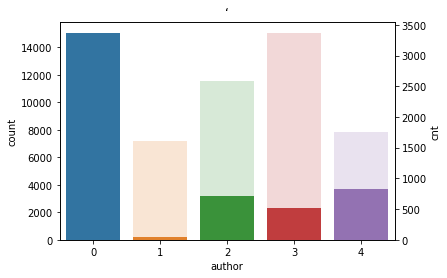

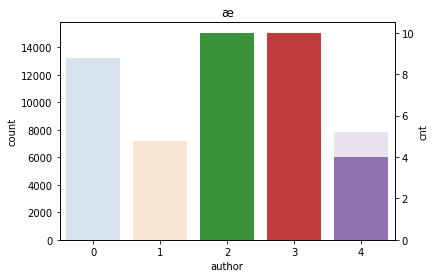

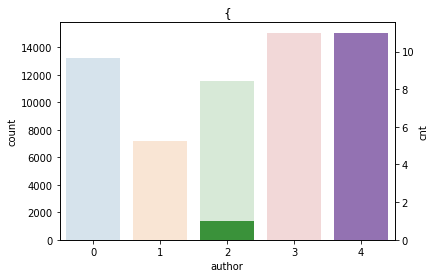

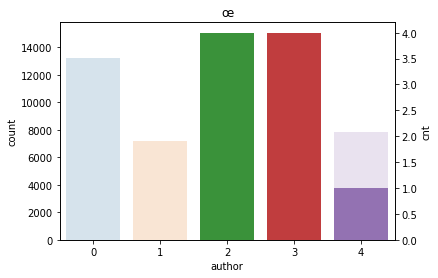

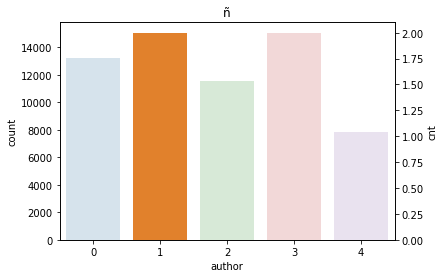

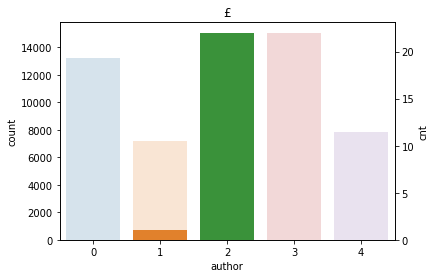

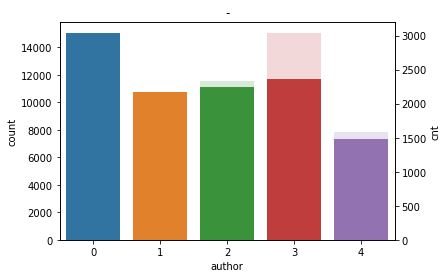

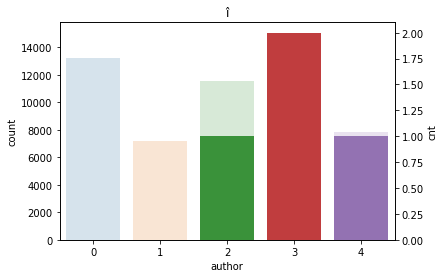

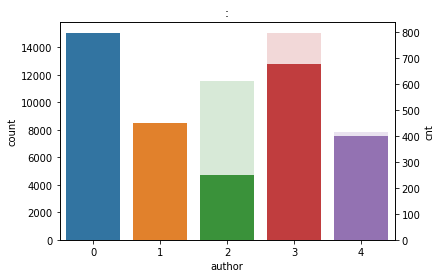

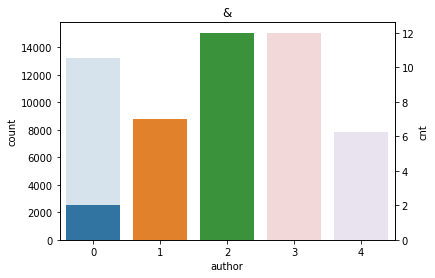

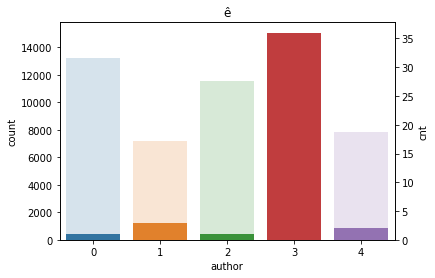

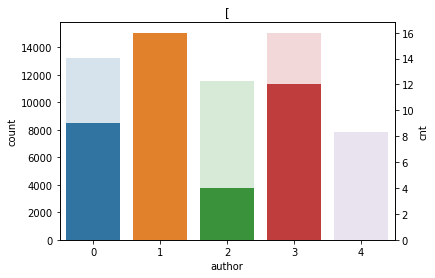

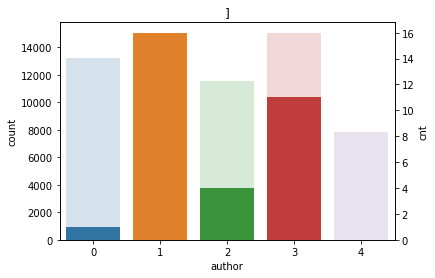

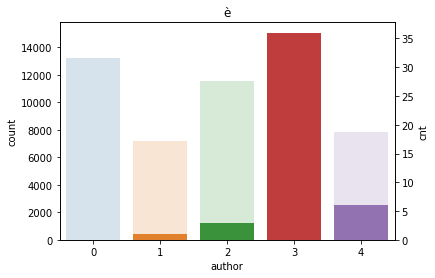

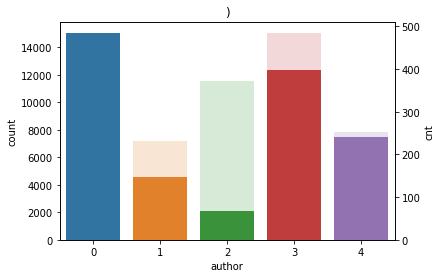

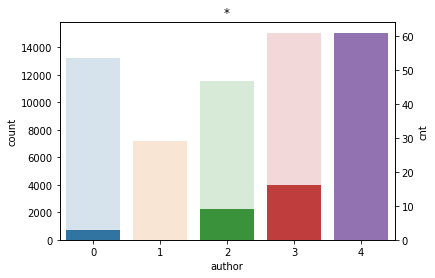

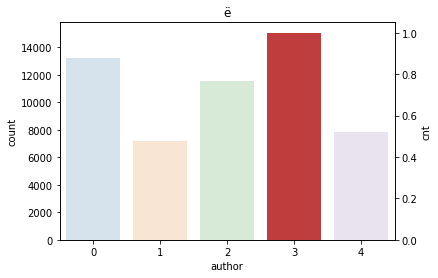

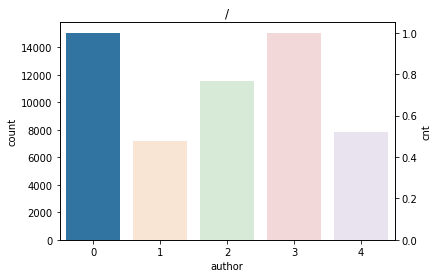

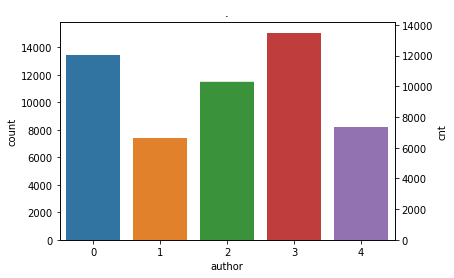

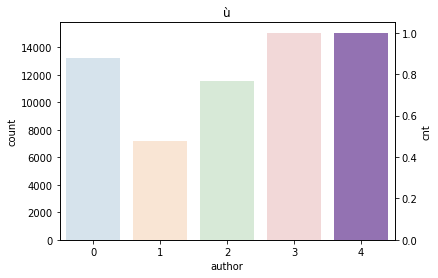

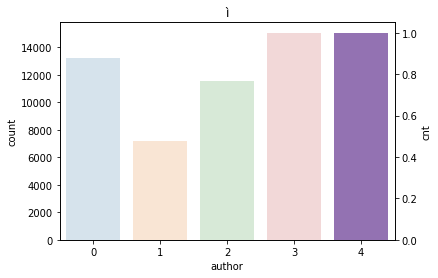

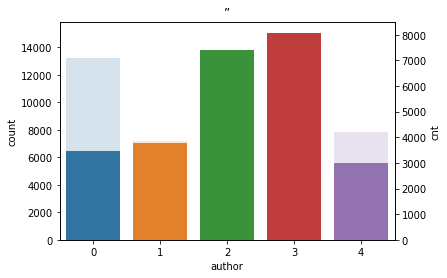

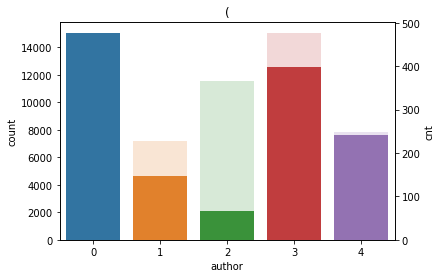

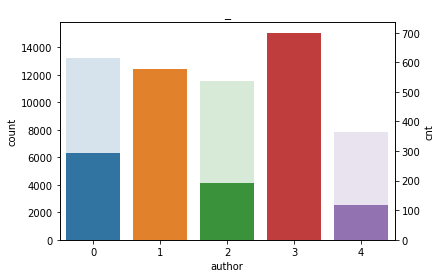

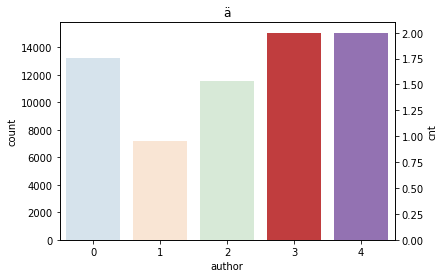

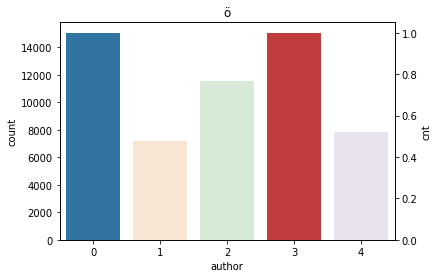

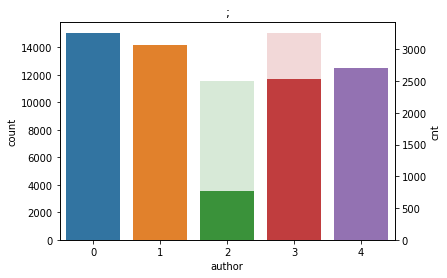

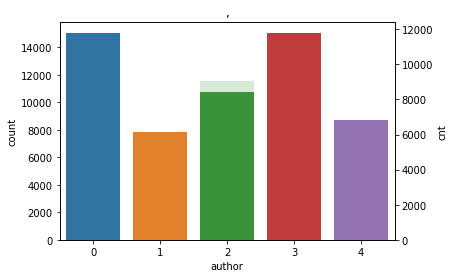

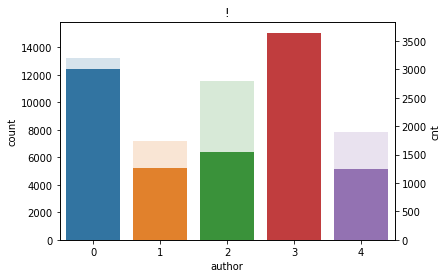

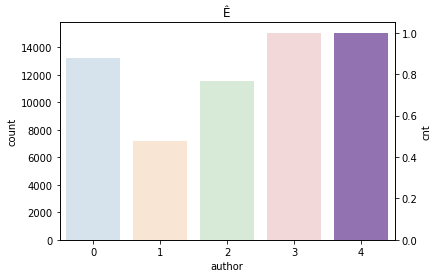

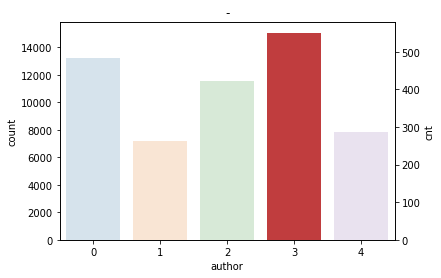

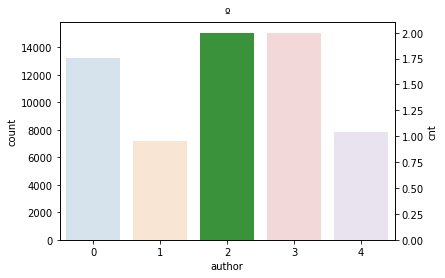

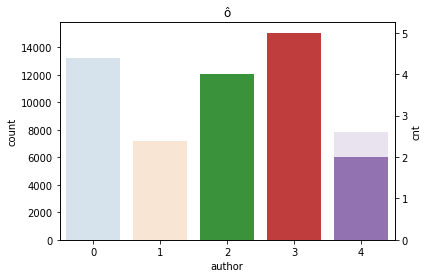

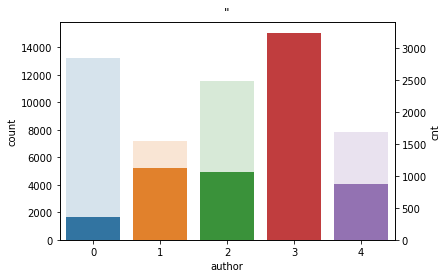

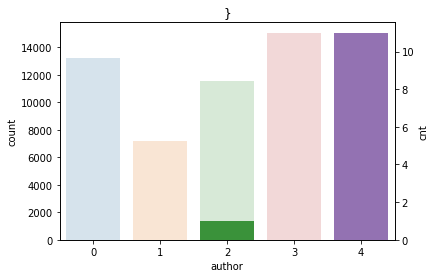

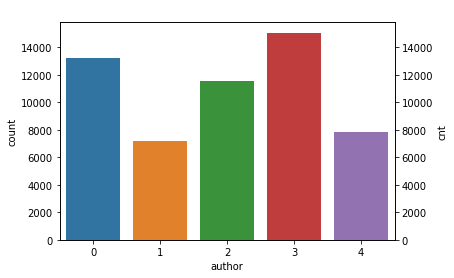

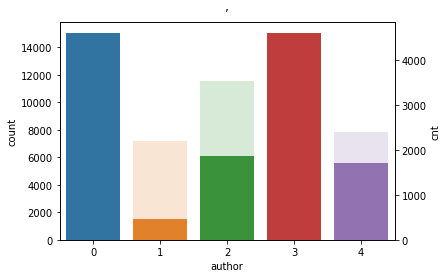

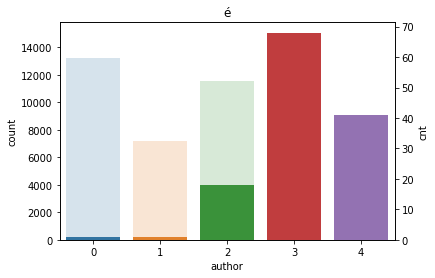

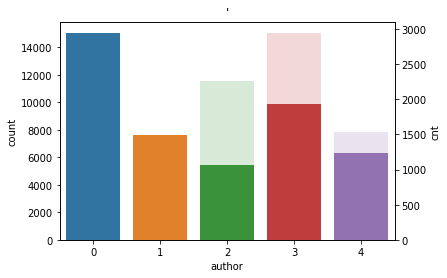

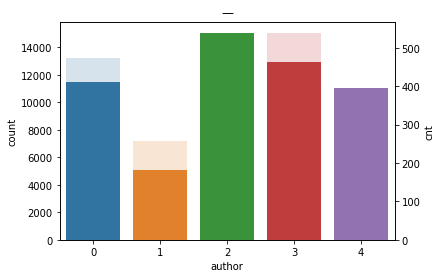

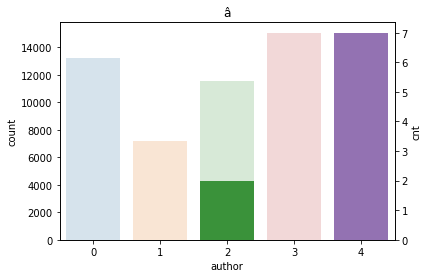

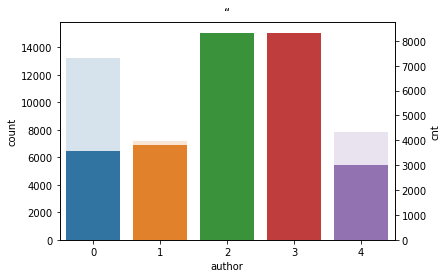

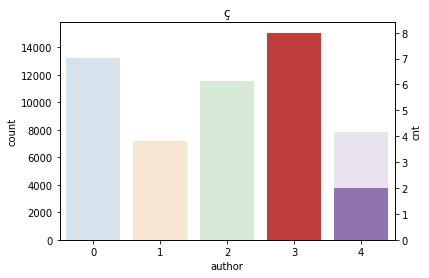

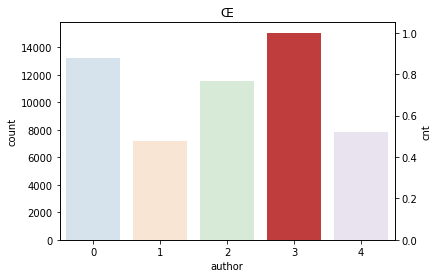

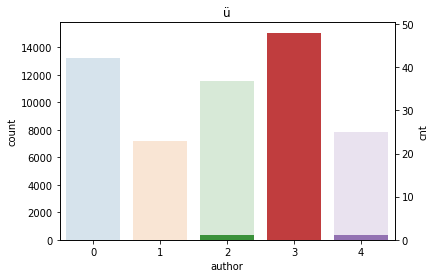

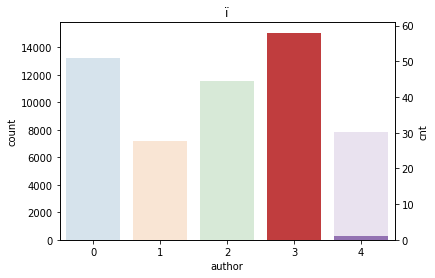

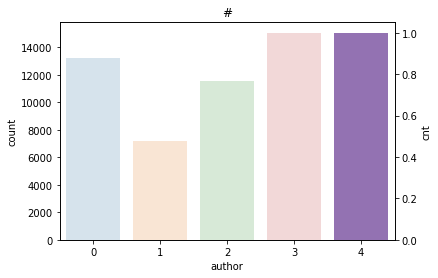

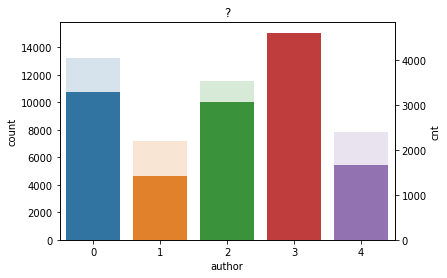

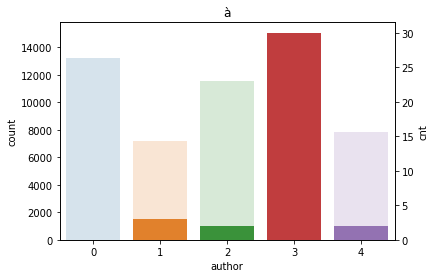

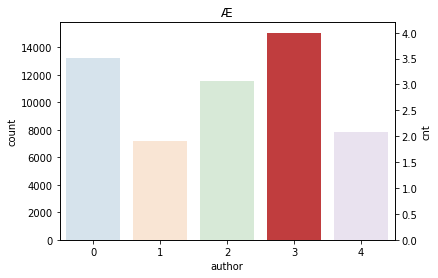

In [52]:
for sc in spec_char:
    train_df['cnt'] = 0
    train_df['cnt'][train_df['text'].str.contains('\\'+sc)] = 1
    train_df['cnt'][train_df['text'].str.contains('\\'+sc)==False] = 0
    ax1 = plt.subplot()
    ax2 = ax1.twinx()
    sns.countplot(data=train_df,x='author',alpha=.2,ax=ax1)
    sns.barplot(data=train_df.groupby('author')['cnt'].sum().reset_index(),
            x='author',y='cnt',ax=ax2).set_title(sc)
    plt.show()

작가별로 대부분의 특수문자의 사용수가 다르다는걸 확인할 수 있습니다.

프랑스어 특수문자가 작가별로 차이나는지 확인합니다.

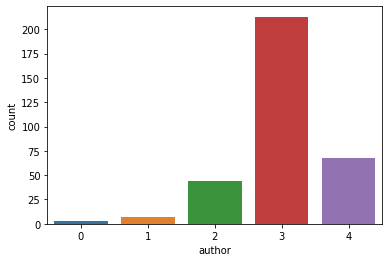

In [53]:
sns.countplot(data = train_df[train_df['text'].str.contains('[à|ä|ö|î|ù|â|Œ|ç|ê|ü|ñ|ô|Æ|œ|ë|æ|é|Ê|è|ì]')],x='author')
plt.show()

작가별 문장의 길이를 파악합니다



In [54]:
train_df['sentencelen'] = train_df['text'].apply(lambda x: len(x.split('.')))

In [55]:
train_df['charlen'] = train_df['text'].apply(lambda x: len(x))

In [56]:
train_df['meanlen'] = train_df['charlen']/(train_df['sentencelen']+1)  ## 0으로 나뉘는것을 방지

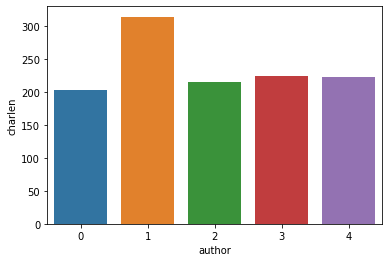

In [57]:
sns.barplot(data=train_df.groupby('author')['charlen'].mean().reset_index(),
        x='author',y='charlen')
plt.show()

작가별 대문자 사용 횟수

In [58]:
train_df['upperlen'] = train_df['text'].apply(lambda x: len(re.findall('[A-Z]',x)))

In [59]:
train_df['meanupperlen'] = train_df['upperlen']/(train_df['sentencelen']+1)  ## 0으로 나뉘는것을 방지

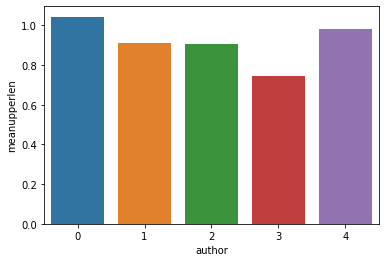

In [60]:
sns.barplot(data=train_df.groupby('author')['meanupperlen'].mean().reset_index(),
        x='author',y='meanupperlen')
plt.show()

일반적인 NLP에서는 특수문자나 숫자를 없애고 소문자로 통일하지만
작가별로 분류하는데 도움이 될까?
작가별 문장길이나 대문자 비율이 도움이 될까?
train셋에서 길이가 작은 문장도 분류에 도움이 될까?
프랑스어특수문자외 다른특수문자는 성질이 다를까?

automl 패키지를 통해 간략하게 확인해보자

In [ ]:
!pip install pycaret

In [62]:
for sc in spec_char:
    try :train_df[sc] = train_df['text'].str.contains(sc)*1/1.0
    except :train_df[sc] = train_df['text'].str.contains('\\'+sc)*1/1.0

In [63]:
train_df.columns

Index(['df_index', 'text', 'author', 'cnt', 'sentencelen', 'charlen',
       'meanlen', 'upperlen', 'meanupperlen', '‘', 'æ', '{', 'œ', 'ñ', '£',
       '-', 'î', ':', '&', 'ê', '[', ']', 'è', ')', '*', 'ë', '/', '.', 'ù',
       'ì', '”', '(', '_', 'ä', 'ö', ';', ',', '!', 'Ê', '‐', 'º', 'ô', '"',
       '}', ' ', '’', 'é', ''', '—', 'â', '“', 'ç', 'Œ', 'ü', 'ï', '#', '?',
       'à', 'Æ'],
      dtype='object')

In [64]:
from pycaret.classification import *

In [68]:
cls = setup(train_df, target = 'author',
            numeric_features = spec_char,
            ignore_features = ['df_index','text','cnt',' ','.','sentencelen','charlen','upperlen'],
            train_size = 0.9,
            )

,Description,Value
0,session_id,3741
1,Target,author
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4"
4,Original Data,"(54879, 59)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [69]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5327,0.8141,0.4788,0.5237,0.5126,0.3934,0.3989,23.032
gbc,Gradient Boosting Classifier,0.5200,0.8001,0.4617,0.5136,0.4909,0.3750,0.3822,14.764
lr,Logistic Regression,0.4826,0.7642,0.4285,0.4600,0.4560,0.3278,0.3326,12.481
ada,Ada Boost Classifier,0.4788,0.7553,0.4212,0.4517,0.4484,0.3213,0.3266,0.924
lda,Linear Discriminant Analysis,0.4638,0.7516,0.4182,0.4462,0.4419,0.3066,0.3108,0.240
ridge,Ridge Classifier,0.4612,0.0000,0.4035,0.4667,0.4215,0.2964,0.3045,0.053
rf,Random Forest Classifier,0.4546,0.7463,0.4181,0.4483,0.4508,0.3020,0.3022,3.341
et,Extra Trees Classifier,0.4439,0.7167,0.4086,0.4376,0.4401,0.2889,0.2891,4.402
knn,K Neighbors Classifier,0.4260,0.7027,0.3858,0.4106,0.4135,0.2623,0.2639,0.952
dt,Decision Tree Classifier,0.4153,0.6460,0.3824,0.4112,0.4127,0.2534,0.2536,0.141


문장의 분석 없이 특수문자빈도수나 문장길이 등만으로도 50% 예측할 수 있었다.

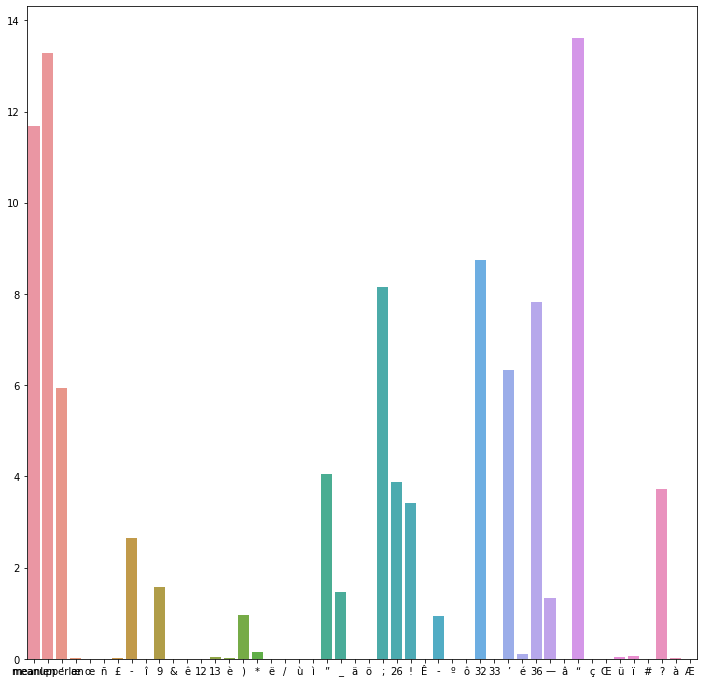

In [70]:
plt.figure(figsize=(12, 12))
sns.barplot(x=best.feature_names_,y=best.feature_importances_)
plt.show()

In [ ]:
#3 = ‘
#9 = :
#12 =[
#13 = ]
#26 = ,
#32 = "
#33 = }
#36 = /

In [ ]:
!pip install shap

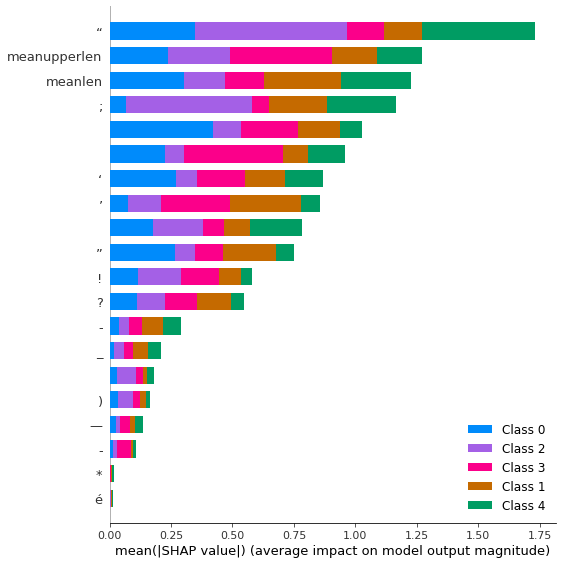

In [75]:
interpret_model(best)

In [ ]:
# meanupperlen, meanlen, ;, ", ', /, ‘, -, :, ), _, ,, !, ‐, ’, —, “, ?

문장의 길이나 대문자빈도수, 특수문자들은 도움이 됐지만
프랑스어는 도움이 되지 않는 것으로 나왔습니다.
이를 확인해보기 위해 프랑스어가 포함된 문장만을 분석해 보겠습니다.

In [98]:
train_df2 = train_df[train_df[["à","ä","ö","î","ù","â","Œ","ç","ê","ü","ñ","ô","Æ","œ","ë","æ","é","Ê","è","ì"]].sum(axis=1)!=0.0].copy()

In [101]:
train_df2['frfreq'] = train_df2['text'].map(lambda x: len(re.findall('[à|ä|ö|î|ù|â|Œ|ç|ê|ü|ñ|ô|Æ|œ|ë|æ|é|Ê|è|ì]',x))/len(x))

In [105]:
train_df2['frcnt'] = train_df2[["à","ä","ö","î","ù","â","Œ","ç","ê","ü","ñ","ô","Æ","œ","ë","æ","é","Ê","è","ì"]].sum(axis=1)

In [106]:
train_df2

,df_index,text,author,cnt,sentencelen,charlen,meanlen,upperlen,meanupperlen,‘,æ,{,œ,ñ,£,-,î,:,&,ê,[,],è,),*,ë,/,.,ù,ì,”,(,_,ä,ö,;,",",!,Ê,‐,º,ô,"""",},,’,é,',—,â,“,ç,Œ,ü,ï,#,?,à,Æ,frfreq,frcnt
76,76,“The purest Ultramontanism!” cried Miüsov impa...,3,0,2,88,29.333333,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.011364,1.0
145,145,It’s long—eight centuries—since we have been ...,3,0,10,1125,102.272727,22,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.002667,1.0
422,422,"He shrugged his shoulders. “Well, perhaps, aft...",2,0,4,179,35.800000,7,1.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005587,1.0
460,460,"“O mon amante, O mon désir, Sachons cueillir ...",4,0,1,65,32.500000,4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015385,1.0
1208,1208,"""To the local governesses of the Fatherland fr...",3,0,1,70,35.000000,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,54226,odin was much perturbed when he heard of the p...,3,0,15,1478,92.375000,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001353,1.0
54452,54452,"""And tell maman to follow me to auntie's direc...",3,0,9,255,25.500000,6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,1.0
54460,54460,"“The devil only knows, what if he deceives us?...",3,0,3,226,56.500000,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.008850,1.0
54595,54595,"‘Governor,’ she said, ‘I am going to elope wit...",4,0,4,170,34.000000,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005882,1.0


In [ ]:
cls = setup(train_df2, target = 'author',
            numeric_features = spec_char,
            ignore_features = ['df_index','text','cnt',' ','.','sentencelen','charlen','upperlen'],
            train_size = 0.9,
            )

In [111]:
best2 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8409,0.0,0.6124,0.8353,0.8287,0.6981,0.7044,0.259
catboost,CatBoost Classifier,0.8242,0.0,0.5706,0.8069,0.8075,0.6620,0.6697,3.625
lr,Logistic Regression,0.8211,0.0,0.5802,0.8124,0.8083,0.6627,0.6689,0.204
ridge,Ridge Classifier,0.8174,0.0,0.6323,0.7954,0.8001,0.6548,0.6620,0.013
et,Extra Trees Classifier,0.8076,0.0,0.5930,0.7991,0.7951,0.6387,0.6455,0.274
lda,Linear Discriminant Analysis,0.8075,0.0,0.6268,0.8284,0.8107,0.6630,0.6709,0.015
rf,Random Forest Classifier,0.8043,0.0,0.5459,0.7788,0.7838,0.6253,0.6343,0.298
dt,Decision Tree Classifier,0.7480,0.0,0.5408,0.7481,0.7428,0.5367,0.5421,0.014
ada,Ada Boost Classifier,0.6214,0.0,0.2838,0.5603,0.5690,0.2061,0.2215,0.056
nb,Naive Bayes,0.5619,0.0,0.4198,0.7195,0.5912,0.3361,0.3799,0.013


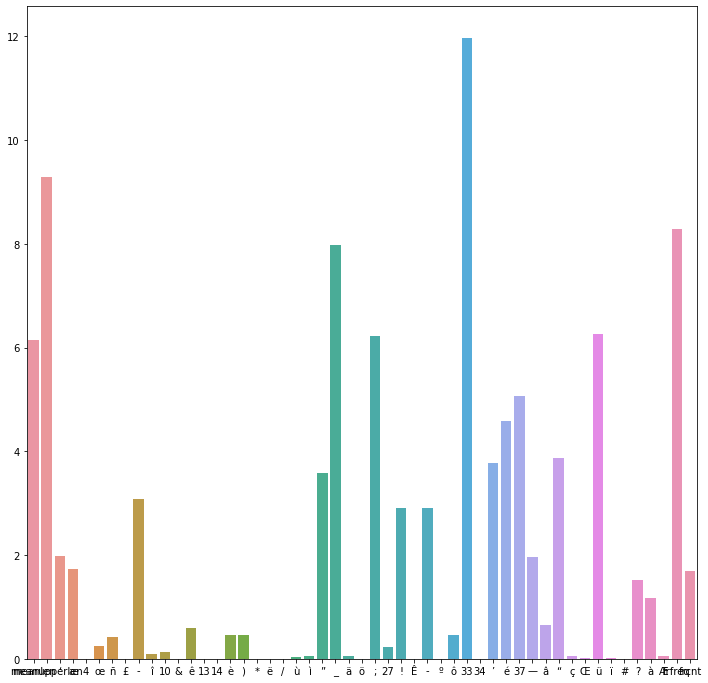

In [113]:
plt.figure(figsize=(12, 12))
sns.barplot(x=best2[1].feature_names_,y=best2[1].feature_importances_)
plt.show()

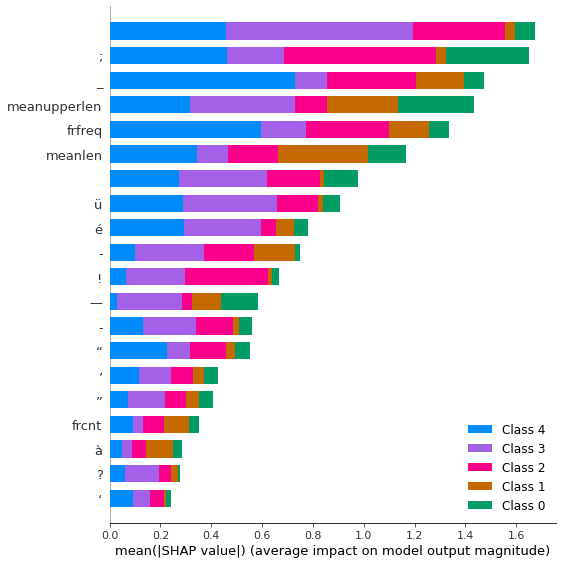

In [115]:
interpret_model(best2[1])

프랑스어가 포함된 문장들만을 분석해본 결과
정확도가 80%로 크게 향상되었습니다.
또한 프랑스어의 빈도나 각 프랑스어가 작가를 구별하는데
많은 영향을 끼침을 알 수 있었습니다.
프랑스어가 포함되지 않은 문장은 많은데 비해
프랑스어가 포함된 문장은 300여문장으로 극히 작습니다.
이에 따라 앞으로 진행될 분석에서 프랑스어가 포함된 문장은 따로 진행하는게
나을 것 같다는 생각입니다.